In [74]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from decouple import config
import zipfile



In [236]:
DATA_PATH = config("FACE_DATA")+"facial_expressions2/"
files = os.listdir(DATA_PATH)
files

['fear.zip',
 'legend.csv',
 'disgust',
 'test',
 '500_picts_satz.csv',
 'images',
 'anger.zip']

In [237]:
DATASET_PATH = DATA_PATH+"legend.csv"
dataset = pd.read_csv(DATASET_PATH)
dataset.head(5)

,user.id,image,emotion
0,628,facial-expressions_2868588k.jpg,anger
1,628,facial-expressions_2868585k.jpg,surprise
2,628,facial-expressions_2868584k.jpg,disgust
3,628,facial-expressions_2868582k.jpg,fear
4,dwdii,Aaron_Eckhart_0001.jpg,neutral


In [238]:
dataset.describe(include="all")

,user.id,image,emotion
count,13690,13690,13690
unique,5,13682,15
top,dwdii,Kimi_Raikkonen_0001.jpg,neutral
freq,6667,2,6717


In [239]:
dataset.emotion.unique()

array(['anger', 'surprise', 'disgust', 'fear', 'neutral', 'happiness',
       'sadness', 'contempt', 'NEUTRAL', 'SADNESS', 'DISGUST', 'FEAR',
       'SURPRISE', 'ANGER', 'HAPPINESS'], dtype=object)

In [240]:
dataset.emotion = dataset.emotion.apply(lambda name: name.lower())
dataset.emotion.unique()

array(['anger', 'surprise', 'disgust', 'fear', 'neutral', 'happiness',
       'sadness', 'contempt'], dtype=object)

In [241]:
dataset.emotion.value_counts()

neutral      6868
happiness    5696
surprise      368
sadness       268
anger         252
disgust       208
fear           21
contempt        9
Name: emotion, dtype: int64

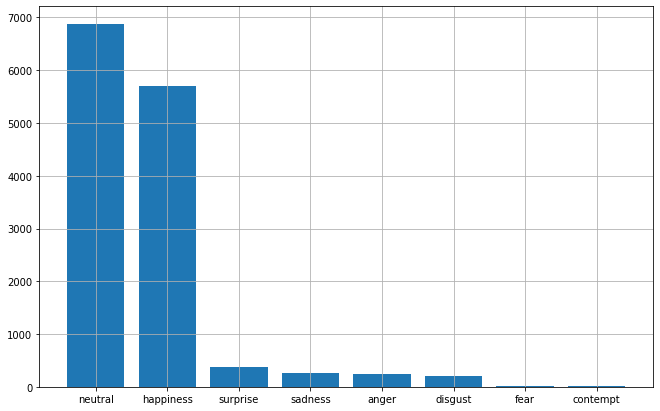

In [248]:
plt.figure(figsize=(11, 7))
# labels = dataset.emotion.unique()
labels = ["neutral", "happiness", "surprise", "sadness", "anger", "disgust", "fear", "contempt"]
counts = dataset.emotion.value_counts().values
plt.bar(np.linspace(0, 7, 8), counts, tick_label=labels)
plt.grid()


<h5 align="left">The dataset cannot be used for classification due to the imbalanced categories</h5>

> a better candidate for a siames network

# Facial Expression dataset 1 | Training Data

In [127]:
DATA_PATH = config("FACE_DATA")+"facial_expressions1/Training/"
subdirs_names = os.listdir(DATA_PATH)
subdirs_names

['Fear', 'Sad', 'Suprise', 'Disgust', 'Angry', 'Neutral', 'Happy']

In [129]:
subdirs_length = []
for path, _, sub_dir in (os.walk(DATA_PATH)):
    subdirs_length.append(len(sub_dir))
    
subdirs_length = subdirs_length[1:]
subdirs_length

[4097, 4830, 3171, 436, 3995, 4965, 7215]

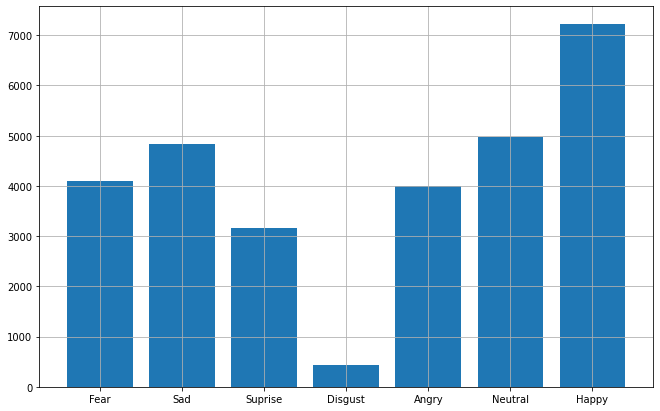

In [189]:
plt.figure(figsize=(11, 7))
plt.bar(np.linspace(0, 6, 7), subdirs_length, tick_label=subdirs_names)
plt.grid()

<h5 align="left">Good candidate for classification</h5>

> requires additional work to rebalance the dataset size for each class to be almost equal using size of 4K


# Facial Expression dataset 1 | Testing Data

In [200]:
DATA_PATH = config("FACE_DATA")+"facial_expressions1/Testing/"
subdirs_names = os.listdir(DATA_PATH)
subdirs_names

['Fear', 'Sad', 'Suprise', 'Disgust', 'Angry', 'Neutral', 'Happy']

In [201]:
subdirs_length = []
for path, _, sub_dir in (os.walk(DATA_PATH)):
    subdirs_length.append(len(sub_dir))
    
subdirs_length = subdirs_length[1:]
subdirs_length

[1024, 1247, 831, 111, 958, 1233, 1774]

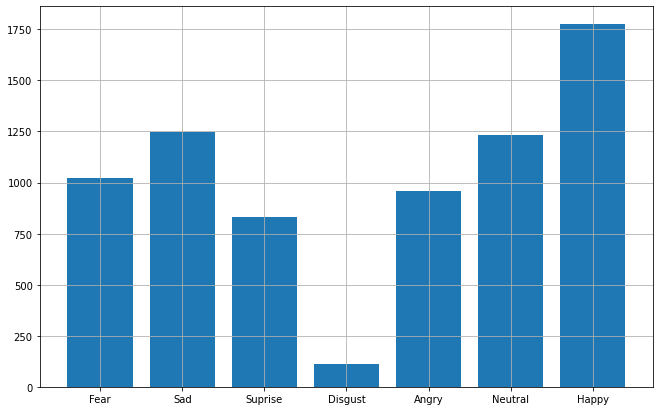

In [202]:
plt.figure(figsize=(11, 7))
plt.bar(np.linspace(0, 6, 7), subdirs_length, tick_label=subdirs_names)
plt.grid()

# Sampling from dataset 1 to rebalance dataset 2

<table align="left">
    <hr>
        <th>
            <h5>Sub-dir</h5>
        </th>
        <th>
            <h5>Number to samble from dataset1</h5>
        </th>
    </hr>
    <tr>
        <th>
            <p>Fear</p>
        </th>
        <th>
            <p>21</p>
        </th>
    </tr>
    <tr>
        <th>
            <p>Surprise</p>
        </th>
        <th>
            <p>350</p>
        </th>
    </tr>
    <tr>
        <th>
            <p>Angry</p>
        </th>
        <th>
            <p>220</p>
        </th>
    </tr>
    
</table>

In [250]:
DATA_PATH = config("FACE_DATA")+"facial_expressions2/"
DATASET_PATH = DATA_PATH+"legend.csv"
dataset = pd.read_csv(DATASET_PATH)
print(dataset.emotion.unique())
dataset.emotion = dataset.emotion.apply(lambda name: name.lower())
print(dataset.emotion.unique())


['anger' 'surprise' 'disgust' 'fear' 'neutral' 'happiness' 'sadness'
 'contempt' 'NEUTRAL' 'SADNESS' 'DISGUST' 'FEAR' 'SURPRISE' 'ANGER'
 'HAPPINESS']
['anger' 'surprise' 'disgust' 'fear' 'neutral' 'happiness' 'sadness'
 'contempt']


In [252]:
sub_dir = "surprise"
subdir_imgs = [row.image for i, row in dataset.iterrows() if row.emotion == sub_dir]
np.random.shuffle(subdir_imgs)
print(len(subdir_imgs))
with zipfile.ZipFile(DATA_PATH+sub_dir+".zip", "w") as wzf:
    for img in subdir_imgs:
        if i == 1000:
            break
        wzf.write(DATA_PATH+"images/"+img)

368


# Checking Dataset 2 after added samples

In [253]:
DATA_PATH = config("FACE_DATA")+"facial_expressions1/Training/"
subdirs_names = os.listdir(DATA_PATH)
subdirs_names

['Fear', 'Sad', 'Suprise', 'Disgust', 'Angry', 'Neutral', 'Happy']

In [254]:
subdirs_length = []
for path, _, sub_dir in (os.walk(DATA_PATH)):
    subdirs_length.append(len(sub_dir))
    
subdirs_length = subdirs_length[1:]
subdirs_length

[4118, 4830, 3539, 644, 4247, 4965, 7215]

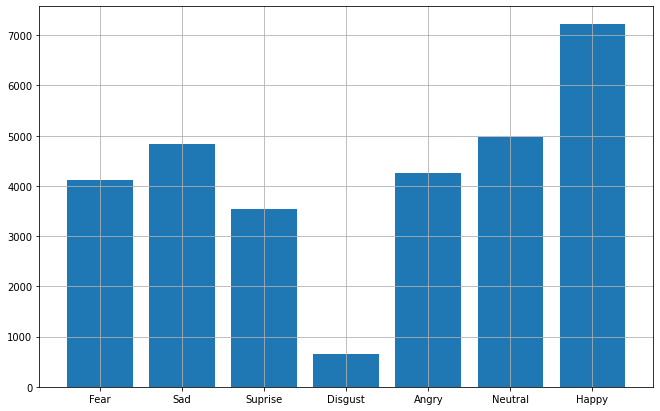

In [255]:
plt.figure(figsize=(11, 7))
plt.bar(np.linspace(0, 6, 7), subdirs_length, tick_label=subdirs_names)
plt.grid()